## 이미지 준비

In [1]:
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
import matplotlib.pyplot as plt

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

truck


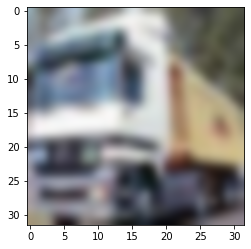

In [6]:
i = 1
plt.imshow(train_images[i], interpolation='bicubic')
print(class_names[train_labels[i][0]])

## 모형 만들기

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## 학습

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
%load_ext tensorboard

In [11]:
import os
import datetime

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
%tensorboard --logdir logs

In [13]:
model.fit(train_images, train_labels, validation_split=0.1, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5879 - accuracy: 0.4177 - val_loss: 1.3179 - val_accuracy: 0.5232
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2126 - accuracy: 0.5708 - val_loss: 1.0999 - val_accuracy: 0.6102
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0443 - accuracy: 0.6329 - val_loss: 0.9805 - val_accuracy: 0.6546
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9390 - accuracy: 0.6708 - val_loss: 0.9817 - val_accuracy: 0.6608
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8631 - accuracy: 0.6998 - val_loss: 0.9457 - val_accuracy: 0.6756
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8044 - accuracy: 0.7180 - val_loss: 0.9251 - val_accuracy: 0.6838
Epoch 7/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7513 - accuracy: 0.7373 - val_loss: 0.8582 - val_ac

## 평가

In [14]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.9150 - accuracy: 0.6943


[0.9149565696716309, 0.6942999958992004]